In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    normalized_mutual_info_score, adjusted_rand_score,
    adjusted_mutual_info_score, v_measure_score,
    completeness_score, homogeneity_score
)


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')
data  = data.drop(columns=' Net Income Flag')

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [ ]:
for i in data.columns:

    data[i] = data[i].fillna(data[i].mean())

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
df = data

In [ ]:
X = df[df.columns[1:]]
y = df['Bankrupt?']

In [ ]:
Xt, yt = RandomUnderSampler().fit_resample(X, y)

In [ ]:
yt.value_counts()

0    220
1    220
Name: Bankrupt?, dtype: int64

In [ ]:
under_sampled_df = pd.concat([Xt, yt], axis=1)

In [ ]:
df = under_sampled_df

In [ ]:
df

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt?
0,0.534149,0.550425,0.575834,0.607367,0.607367,0.999037,0.797467,0.809379,0.303518,0.781643,...,0.806938,0.004775,0.624067,0.607365,0.840802,0.278058,0.026935,0.565761,0.038899,0
1,0.559206,0.589184,0.605600,0.618595,0.618595,0.999215,0.797678,0.809527,0.303515,0.781810,...,0.828662,0.000968,0.656859,0.618597,0.841748,0.275589,0.026813,0.565260,0.116911,0
2,0.506898,0.566834,0.559291,0.605897,0.604744,0.999004,0.797657,0.809564,0.303918,0.781842,...,0.817248,0.005326,0.624050,0.605894,0.841164,0.275673,0.026824,0.565311,0.107833,0
3,0.447180,0.469854,0.495423,0.609089,0.609089,0.998833,0.796685,0.808628,0.302578,0.781135,...,0.751556,0.006056,0.623203,0.609085,0.836542,0.279424,0.026593,0.563996,0.030643,0
4,0.451519,0.519734,0.502704,0.599562,0.599562,0.998978,0.797204,0.809142,0.303183,0.781334,...,0.786248,0.088773,0.624044,0.599559,0.839449,0.276852,0.026357,0.561645,0.054822,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.418515,0.433984,0.461427,0.612750,0.612750,0.998864,0.796902,0.808857,0.302892,0.781254,...,0.725750,0.000487,0.623730,0.612747,0.828067,0.292648,0.026666,0.564481,0.015620,1
436,0.196802,0.211023,0.221425,0.598056,0.598056,0.998933,0.796144,0.808149,0.301423,0.780388,...,0.519388,0.017588,0.623465,0.598051,0.856906,0.259280,0.026769,0.565052,0.003946,1
437,0.337640,0.254307,0.378446,0.590842,0.590842,0.998869,0.796943,0.808897,0.302953,0.781340,...,0.557733,0.000847,0.623302,0.590838,0.726888,0.336515,0.026777,0.565092,0.011797,1
438,0.340028,0.344636,0.380213,0.581466,0.581466,0.998372,0.796292,0.808283,0.302857,0.780733,...,0.641804,0.000376,0.623497,0.581461,0.765967,0.337315,0.026722,0.564807,0.011777,1


In [ ]:
data = df

In [ ]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
scaled_data

array([[ 0.85851058,  0.39816371,  0.7440721 , ...,  0.02358483,
         0.04723986, -1.        ],
       [ 1.162906  ,  0.78248478,  1.0775553 , ..., -0.03038806,
         1.61751877, -1.        ],
       [ 0.52746575,  0.56086503,  0.55873702, ..., -0.02497603,
         1.43479611, -1.        ],
       ...,
       [-1.52868389, -2.53802767, -1.4673533 , ..., -0.04853203,
        -0.49828415,  1.        ],
       [-1.49966565, -1.64235957, -1.44756023, ..., -0.07918952,
        -0.49868656,  1.        ],
       [ 0.34861863,  0.33762368,  0.26783891, ...,  0.05987406,
        -0.28869748,  1.        ]])

In [ ]:
import matplotlib.pyplot as plt

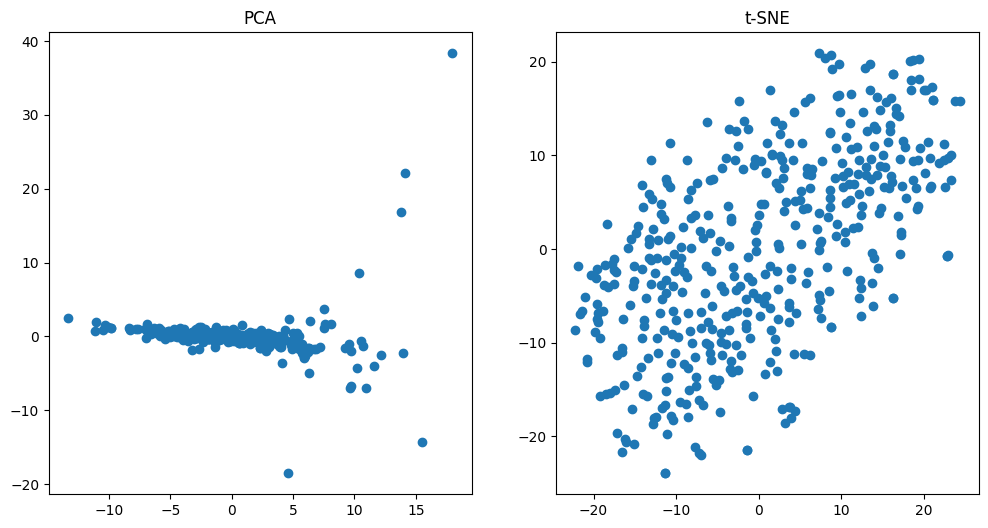

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

pca_result = pca.fit_transform(scaled_data)
tsne_result = tsne.fit_transform(scaled_data)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title("PCA")

plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title("t-SNE")

plt.show()

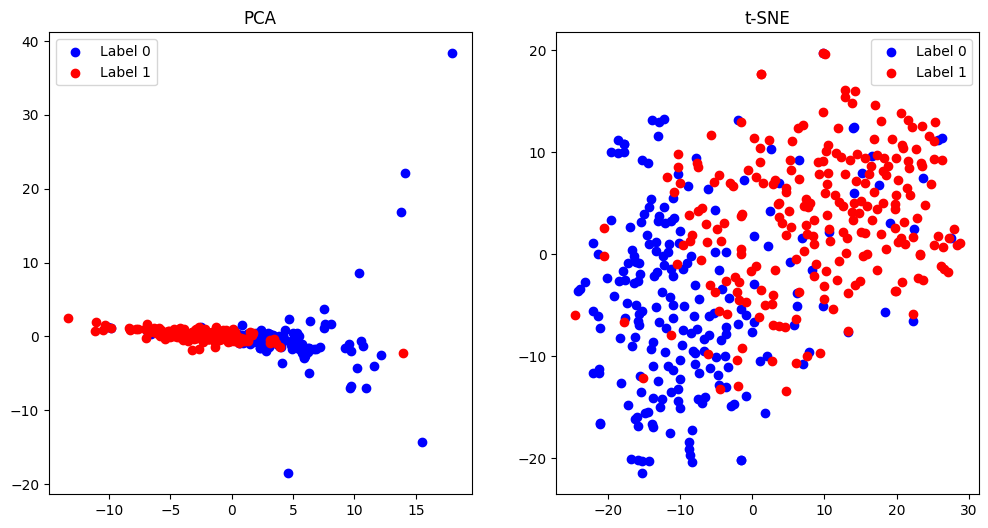

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply dimensionality reduction techniques
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

# Assuming 'labels' contains your binary labels (0 or 1)
# You should replace 'labels' with your actual label data
# You can create it like this:
# labels = data['Bankrupt?'].values

pca_result = pca.fit_transform(scaled_data)
tsne_result = tsne.fit_transform(scaled_data)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[labels == 0, 0], pca_result[labels == 0, 1], label='Label 0', c='blue')
plt.scatter(pca_result[labels == 1, 0], pca_result[labels == 1, 1], label='Label 1', c='red')
plt.title("PCA")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(tsne_result[labels == 0, 0], tsne_result[labels == 0, 1], label='Label 0', c='blue')
plt.scatter(tsne_result[labels == 1, 0], tsne_result[labels == 1, 1], label='Label 1', c='red')
plt.title("t-SNE")
plt.legend()

plt.show()


In [ ]:
# ONLY FOR KMEAN
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,

In [ ]:
silhouette = silhouette_score(scaled_data, labels)
calinski_harabasz = calinski_harabasz_score(scaled_data, labels)
davies_bouldin = davies_bouldin_score(scaled_data, labels)
normalized_mutual_info = normalized_mutual_info_score(data['Bankrupt?'].values, labels)
adjusted_rand = adjusted_rand_score(data['Bankrupt?'].values, labels)
adjusted_mutual_info = adjusted_mutual_info_score(data['Bankrupt?'].values, labels)
v_measure = v_measure_score(data['Bankrupt?'].values, labels)
completeness = completeness_score(data['Bankrupt?'].values, labels)
homogeneity = homogeneity_score(data['Bankrupt?'].values, labels)


print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")
print(f"Normalized Mutual Info: {normalized_mutual_info:.4f}")
print(f"Adjusted Rand Index: {adjusted_rand:.4f}")
print(f"Adjusted Mutual Info: {adjusted_mutual_info:.4f}")
print(f"V-Measure: {v_measure:.4f}")
print(f"Completeness Score: {completeness:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")


Silhouette Score: 0.1472
Calinski-Harabasz Score: 54.2739
Davies-Bouldin Score: 2.2696
Normalized Mutual Info: 0.3828
Adjusted Rand Index: 0.4637
Adjusted Mutual Info: 0.3817
V-Measure: 0.3828
Completeness Score: 0.3854
Homogeneity Score: 0.3802


In [ ]:
import matplotlib as plt

In [ ]:
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    normalized_mutual_info_score, adjusted_rand_score,
    adjusted_mutual_info_score, v_measure_score,
    completeness_score, homogeneity_score
)

# Define a function to evaluate clustering metrics for a given model
def evaluate_clustering_metrics(model, data, scaled_data):
    labels = model.fit_predict(scaled_data)
    evaluation_metricsx = {
        'Silhouette Score': silhouette_score(scaled_data, labels),
        'Calinski-Harabasz Score': calinski_harabasz_score(scaled_data, labels),
        'Davies-Bouldin Score': davies_bouldin_score(scaled_data, labels),
        'Normalized Mutual Info': normalized_mutual_info_score(data['Bankrupt?'].values, labels),
        'Adjusted Rand Index': adjusted_rand_score(data['Bankrupt?'].values, labels),
        'Adjusted Mutual Info': adjusted_mutual_info_score(data['Bankrupt?'].values, labels),
        'V-Measure': v_measure_score(data['Bankrupt?'].values, labels),
        'Completeness Score': completeness_score(data['Bankrupt?'].values, labels),
        'Homogeneity Score': homogeneity_score(data['Bankrupt?'].values, labels),
    }
    return evaluation_metricsx

# Initialize a list to store clustering models
clustering_models = [
    KMeans(n_clusters=2),
    KMeans(n_clusters=3),
    AgglomerativeClustering(n_clusters=2),
    AgglomerativeClustering(n_clusters=3),
    SpectralClustering(n_clusters=2),
    SpectralClustering(n_clusters=3)
]

lx =[]
# Loop through all clustering models and evaluate metrics
for model in clustering_models:
    d = []
    print(f"Model: {model.__class__.__name__}")
    metrics = evaluate_clustering_metrics(model, data, scaled_data)
    for metric_name, score in metrics.items():
        print(f"{metric_name}: {score:.4f}")
        d.append(score)
    lx.append(d)
    print()


Model: KMeans
Silhouette Score: 0.1354
Calinski-Harabasz Score: 54.1903
Davies-Bouldin Score: 2.2583
Normalized Mutual Info: 0.4084
Adjusted Rand Index: 0.5082
Adjusted Mutual Info: 0.4074
V-Measure: 0.4084
Completeness Score: 0.4085
Homogeneity Score: 0.4082

Model: KMeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.1170
Calinski-Harabasz Score: 42.6890
Davies-Bouldin Score: 2.4058
Normalized Mutual Info: 0.3623
Adjusted Rand Index: 0.3676
Adjusted Mutual Info: 0.3605
V-Measure: 0.3623
Completeness Score: 0.3184
Homogeneity Score: 0.4203

Model: AgglomerativeClustering
Silhouette Score: 0.1129
Calinski-Harabasz Score: 46.2812
Davies-Bouldin Score: 2.3981
Normalized Mutual Info: 0.3666
Adjusted Rand Index: 0.4452
Adjusted Mutual Info: 0.3655
V-Measure: 0.3666
Completeness Score: 0.3693
Homogeneity Score: 0.3639

Model: AgglomerativeClustering
Silhouette Score: 0.1189
Calinski-Harabasz Score: 41.5183
Davies-Bouldin Score: 1.8597
Normalized Mutual Info: 0.3593
Adjusted Rand Index: 0.4363
Adjusted Mutual Info: 0.3569
V-Measure: 0.3593
Completeness Score: 0.3525
Homogeneity Score: 0.3662

Model: SpectralClustering


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score: 0.5997
Calinski-Harabasz Score: 7.8738
Davies-Bouldin Score: 0.2874
Normalized Mutual Info: 0.0044
Adjusted Rand Index: 0.0000
Adjusted Mutual Info: 0.0000
V-Measure: 0.0044
Completeness Score: 0.0980
Homogeneity Score: 0.0023

Model: SpectralClustering


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[3.21599414e-15 1.90743709e-06 4.24778286e-06 8.33072932e-06]
not reaching the requested tolerance 6.556510925292969e-06.
  _, diffusion_map = lobpcg(


Silhouette Score: 0.5841
Calinski-Harabasz Score: 7.6706
Davies-Bouldin Score: 0.2938
Normalized Mutual Info: 0.0087
Adjusted Rand Index: -0.0000
Adjusted Mutual Info: -0.0000
V-Measure: 0.0087
Completeness Score: 0.0978
Homogeneity Score: 0.0045



In [ ]:
df_res = pd.DataFrame(lx,index=clustering_models,columns= metrics.keys())

In [ ]:
df_res

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score,Normalized Mutual Info,Adjusted Rand Index,Adjusted Mutual Info,V-Measure,Completeness Score,Homogeneity Score
KMeans(n_clusters=2),0.135380,54.190346,2.258250,0.408398,0.508158,4.074230e-01,0.408398,0.408547,0.408249
KMeans(n_clusters=3),0.117022,42.688999,2.405845,0.362335,0.367632,3.605114e-01,0.362335,0.318415,0.420309
AgglomerativeClustering(),0.112915,46.281173,2.398059,0.366584,0.445228,3.655324e-01,0.366584,0.369256,0.363950
AgglomerativeClustering(n_clusters=3),0.118913,41.518288,1.859733,0.359252,0.436263,3.568750e-01,0.359252,0.352518,0.366249
SpectralClustering(n_clusters=2),0.599670,7.873829,0.287356,0.004450,0.000000,1.741860e-15,0.004450,0.097985,0.002276
SpectralClustering(n_clusters=3),0.584133,7.670618,0.293845,0.008687,-0.000021,-1.440000e-05,0.008687,0.097840,0.004545


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.cluster import (
    KMeans, AgglomerativeClustering, SpectralClustering,
    DBSCAN, MeanShift
)
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    normalized_mutual_info_score, adjusted_rand_score,
    adjusted_mutual_info_score, v_measure_score,
    completeness_score, homogeneity_score
)

# Define a function to evaluate clustering metrics for a given model
def evaluate_clustering_metrics(model, data, scaled_data):
    labels = model.fit_predict(scaled_data)

    # Check if there are at least two unique labels
    unique_labels = len(np.unique(labels))
    if unique_labels < 2:
        print(f"Model: {model.__class__.__name__} did not form at least two clusters.")
        return None

    evaluation_metricsx = {
        'Silhouette Score': silhouette_score(scaled_data, labels),
        'Calinski-Harabasz Score': calinski_harabasz_score(scaled_data, labels),
        'Davies-Bouldin Score': davies_bouldin_score(scaled_data, labels),
        'Normalized Mutual Info': normalized_mutual_info_score(data['Bankrupt?'].values, labels),
        'Adjusted Rand Index': adjusted_rand_score(data['Bankrupt?'].values, labels),
        'Adjusted Mutual Info': adjusted_mutual_info_score(data['Bankrupt?'].values, labels),
        'V-Measure': v_measure_score(data['Bankrupt?'].values, labels),
        'Completeness Score': completeness_score(data['Bankrupt?'].values, labels),
        'Homogeneity Score': homogeneity_score(data['Bankrupt?'].values, labels),
    }
    return evaluation_metricsx

# Initialize a list to store clustering models
clustering_models = [
    KMeans(n_clusters=2),
    KMeans(n_clusters=3),
    AgglomerativeClustering(n_clusters=2),
    AgglomerativeClustering(n_clusters=3),
    SpectralClustering(n_clusters=2),
    SpectralClustering(n_clusters=3),
    DBSCAN(),
    MeanShift()
]

lx = []
# Loop through all clustering models and evaluate metrics
for model in clustering_models:
    d = []
    print(f"Model: {model.__class__.__name__}")
    metrics = evaluate_clustering_metrics(model, data, scaled_data)

    # Check if metrics are available (not None)
    if metrics is not None:
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score:.4f}")
            d.append(score)
        lx.append(d)
    print()


Model: KMeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.1440
Calinski-Harabasz Score: 54.2664
Davies-Bouldin Score: 2.2678
Normalized Mutual Info: 0.3838
Adjusted Rand Index: 0.4699
Adjusted Mutual Info: 0.3828
V-Measure: 0.3838
Completeness Score: 0.3856
Homogeneity Score: 0.3820

Model: KMeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.1334
Calinski-Harabasz Score: 45.7468
Davies-Bouldin Score: 1.7594
Normalized Mutual Info: 0.4173
Adjusted Rand Index: 0.5181
Adjusted Mutual Info: 0.4152
V-Measure: 0.4173
Completeness Score: 0.4071
Homogeneity Score: 0.4280

Model: AgglomerativeClustering
Silhouette Score: 0.1129
Calinski-Harabasz Score: 46.2812
Davies-Bouldin Score: 2.3981
Normalized Mutual Info: 0.3666
Adjusted Rand Index: 0.4452
Adjusted Mutual Info: 0.3655
V-Measure: 0.3666
Completeness Score: 0.3693
Homogeneity Score: 0.3639

Model: AgglomerativeClustering
Silhouette Score: 0.1189
Calinski-Harabasz Score: 41.5183
Davies-Bouldin Score: 1.8597
Normalized Mutual Info: 0.3593
Adjusted Rand Index: 0.4363
Adjusted Mutual Info: 0.3569
V-Measure: 0.3593
Completeness Score: 0.3525
Homogeneity Score: 0.3662

Model: SpectralClustering


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 375 with accuracies 
[6.17958698e-15 2.71403185e-05 6.35298225e-06]
not reaching the requested tolerance 6.556510925292969e-06.
Use iteration 375 instead with accuracy 
1.1164433597578181e-05.

  _, diffusion_map = lobpcg(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[3.45742232e-15 2.71403186e-05 6.35298204e-06]
not reaching the requested tolerance 6.556510925292969e-06.
  _, diffusion_map = lobpcg(


Silhouette Score: 0.5997
Calinski-Harabasz Score: 7.8738
Davies-Bouldin Score: 0.2874
Normalized Mutual Info: 0.0044
Adjusted Rand Index: 0.0000
Adjusted Mutual Info: 0.0000
V-Measure: 0.0044
Completeness Score: 0.0980
Homogeneity Score: 0.0023

Model: SpectralClustering


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 863 with accuracies 
[1.66646217e-15 3.63107035e-06 8.57006520e-06 6.32551258e-06]
not reaching the requested tolerance 6.556510925292969e-06.
Use iteration 863 instead with accuracy 
4.631662034633453e-06.

  _, diffusion_map = lobpcg(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[1.82406396e-15 3.63107018e-06 8.57006517e-06 6.32551272e-06]
not reaching the requested tolerance 6.556510925292969e-06.
  _, diffusion_map = lobpcg(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly

Silhouette Score: 0.5997
Calinski-Harabasz Score: 7.8738
Davies-Bouldin Score: 0.2874
Normalized Mutual Info: 0.0044
Adjusted Rand Index: 0.0000
Adjusted Mutual Info: 0.0000
V-Measure: 0.0044
Completeness Score: 0.0980
Homogeneity Score: 0.0023

Model: DBSCAN
Model: DBSCAN did not form at least two clusters.

Model: MeanShift
Silhouette Score: 0.2481
Calinski-Harabasz Score: 14.9648
Davies-Bouldin Score: 0.4733
Normalized Mutual Info: 0.1167
Adjusted Rand Index: 0.0040
Adjusted Mutual Info: 0.0390
V-Measure: 0.1167
Completeness Score: 0.1083
Homogeneity Score: 0.1265



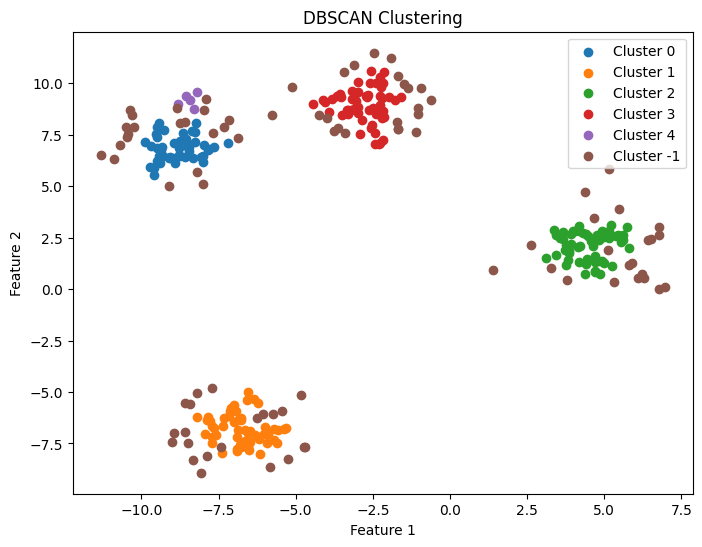

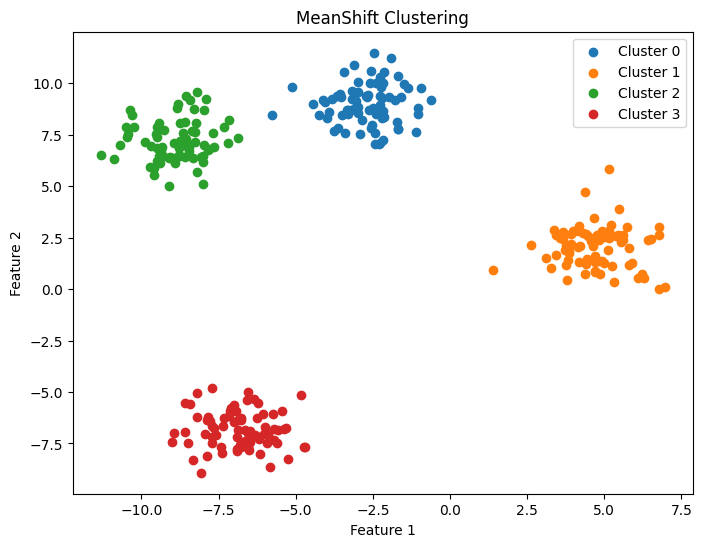

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, MeanShift
from sklearn.datasets import make_blobs

# Generate sample data (you can replace this with your own data)
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Define a function to visualize clustering results
def plot_clusters(model, data):
    labels = model.fit_predict(data)
    unique_labels = set(labels)

    plt.figure(figsize=(8, 6))
    for label in unique_labels:
        cluster_mask = (labels == label)
        plt.scatter(data[cluster_mask, 0], data[cluster_mask, 1], label=f'Cluster {label}')

    plt.title(f'{model.__class__.__name__} Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Visualize DBSCAN clusters
dbscan_model = DBSCAN(eps=0.5, min_samples=5)  # You can adjust eps and min_samples
plot_clusters(dbscan_model, data)

# Visualize Mean Shift clusters
mean_shift_model = MeanShift(bandwidth=2)  # You can adjust bandwidth
plot_clusters(mean_shift_model, data)


In [ ]:
from sklearn.cluster import AffinityPropagation
affinity_propragation = AffinityPropagation(damping = 0.9, preference = 200)
affinity_propragation.fit(scaled_data)

cluster_labels = affinity_propragation.labels_

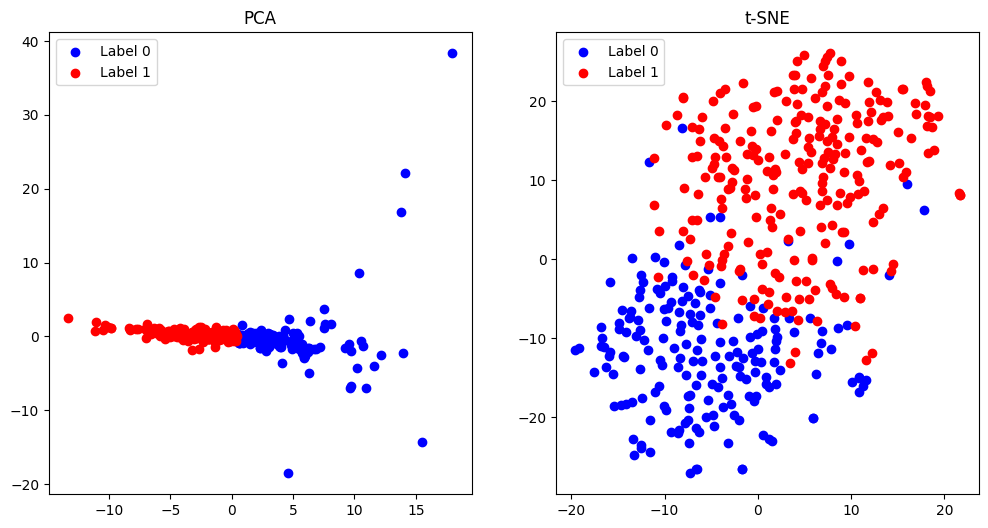

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply dimensionality reduction techniques
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

# Assuming 'labels' contains your binary labels (0 or 1)
# You should replace 'labels' with your actual label data
# You can create it like this:
# labels = data['Bankrupt?'].values

pca_result = pca.fit_transform(scaled_data)
tsne_result = tsne.fit_transform(scaled_data)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[labels == 0, 0], pca_result[labels == 0, 1], label='Label 0', c='blue')
plt.scatter(pca_result[labels == 1, 0], pca_result[labels == 1, 1], label='Label 1', c='red')
plt.title("PCA")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(tsne_result[labels == 0, 0], tsne_result[labels == 0, 1], label='Label 0', c='blue')
plt.scatter(tsne_result[labels == 1, 0], tsne_result[labels == 1, 1], label='Label 1', c='red')
plt.title("t-SNE")
plt.legend()

plt.show()
